<a href="https://colab.research.google.com/github/milicak/Data_Analysis_Course/blob/main/Normal_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [9]:
from scipy.stats import norm

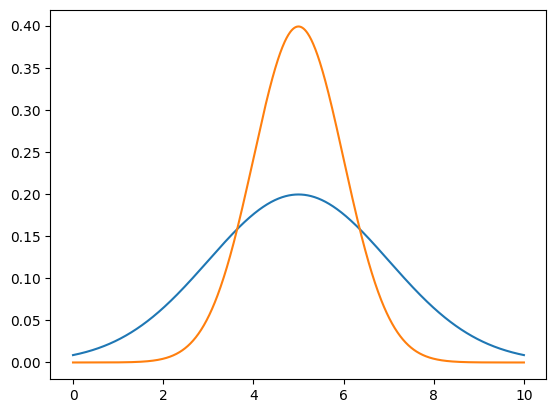

In [20]:
# CALCUATING MEAN AND STANDARD DEVIATION
mu = 5
sigma = 2
x = np.linspace(0, 10, 1000)
plt.plot(x, norm.pdf(x, mu, sigma))
sigma = 1
plt.plot(x, norm.pdf(x, mu, sigma))

In [23]:
# norm.cdf() calculates the cumulative probability
N = 7
prob_less_than_N= norm.cdf(N, mu, sigma)
print(
    "The probability that a student will score less than", str(N), "is",
    round(prob_less_than_N, 4),
)

The probability that a student will score less than 7 is 0.9772


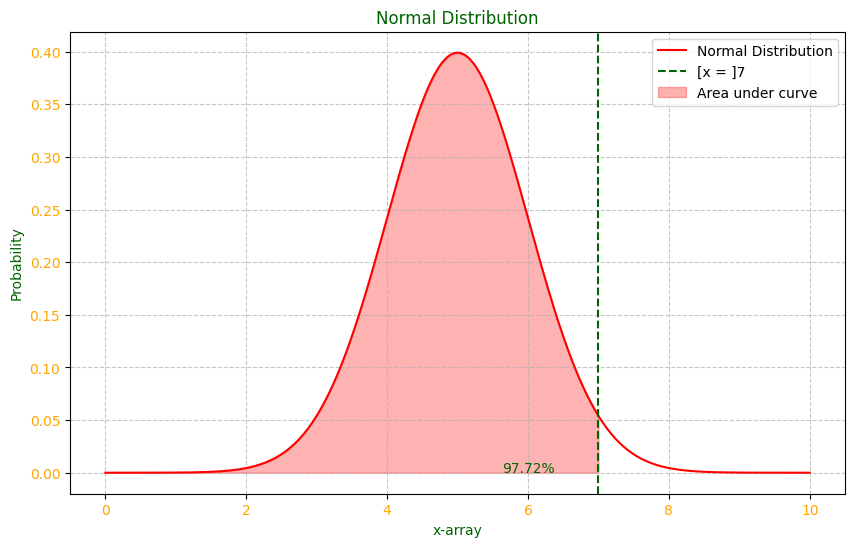

In [31]:
# Calculate the area under the curve up to x = 800
area_under_curve = norm.cdf(N, mu, sigma)
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the pdf of the normal distribution
ax.plot(x, norm.pdf(x, mu, sigma), color="red", label="Normal Distribution")
# Draw a red vertical line at x = 800
ax.axvline(x=N, color="darkgreen", linestyle="--", label=("[x = ]"+str(N)))

# Create an array of 50 numbers between min of x array and N
x1 = np.linspace(x.min(), N, 50)

# Fill the specified region with red color
ax.fill_between(x1, norm.pdf(x1, mu, sigma), color="red", alpha=0.3, label="Area under curve")

ax.set(xlabel="x-array", ylabel="Probability")

ax.xaxis.label.set_color("darkgreen")
ax.yaxis.label.set_color("darkgreen")

ax.set_title("Normal Distribution", color="darkgreen")

# Add the percentage value on the plot
ax.text(N-1, 0.00015, f"{area_under_curve * 100:.2f}%", color="darkgreen", fontsize=10, ha='center')

ax.legend()

plt.xticks(color='orange')
plt.yticks(color='orange')

# Customize the grid lines
ax.grid(True, linestyle='--', alpha=0.7)


In [36]:
prob_max = 1 - norm.cdf(7.9, mu, sigma)
print(
    "The probability that a value will be more than 7.9 is",
    round(prob_max, 4),
)

The probability that a value will be more than 7.9 is 0.0019


In [4]:
import xarray as xr

In [5]:
df = xr.tutorial.open_dataset('ersstv5')
df

<xarray.Dataset> Size: 40MB
Dimensions:    (lat: 89, lon: 180, time: 624, nbnds: 2)
Coordinates:
  * lat        (lat) float32 356B 88.0 86.0 84.0 82.0 ... -84.0 -86.0 -88.0
  * lon        (lon) float32 720B 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 5kB 1970-01-01 1970-02-01 ... 2021-12-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 10kB ...
    sst        (time, lat, lon) float32 40MB ...
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2022-06-07

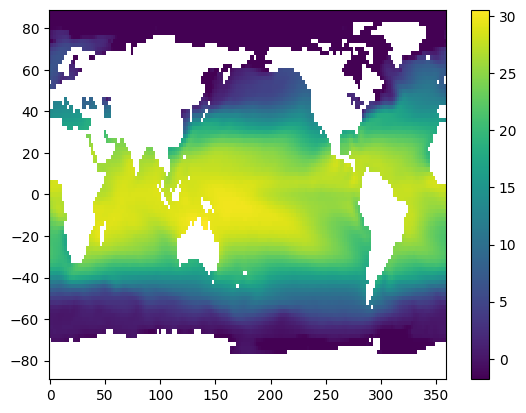

In [6]:
plt.pcolormesh(df.lon,df.lat,df.sst[0,:,:]);plt.colorbar()

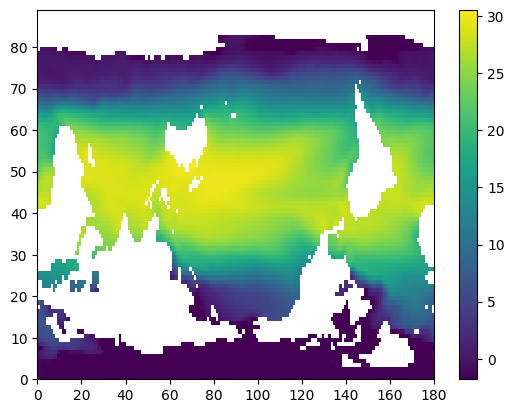

In [ ]:
plt.pcolormesh(df.sst[0,:,:]);plt.colorbar()

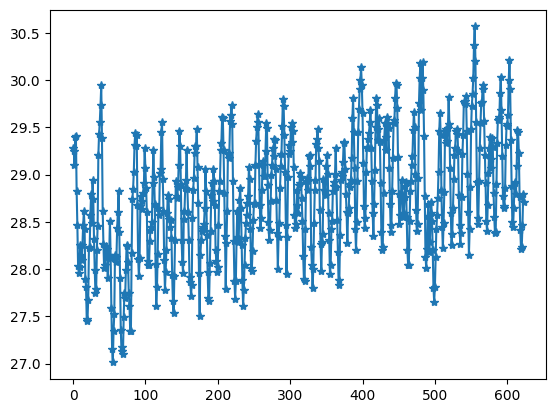

In [7]:
plt.plot(df.sst[:,50,100],'-*')

(array([1.17793e+06, 5.19460e+04, 5.89460e+04, 6.81600e+04, 7.01860e+04,
        7.05370e+04, 7.08290e+04, 6.77000e+04, 6.38250e+04, 6.08440e+04,
        5.73440e+04, 5.57570e+04, 5.33540e+04, 5.05620e+04, 4.94780e+04,
        4.83490e+04, 4.70940e+04, 4.62910e+04, 4.61800e+04, 4.64090e+04,
        4.71830e+04, 4.70530e+04, 4.70750e+04, 4.64450e+04, 4.72320e+04,
        4.82470e+04, 4.77020e+04, 4.69510e+04, 4.61140e+04, 4.64240e+04,
        4.61780e+04, 4.61460e+04, 4.56360e+04, 4.46420e+04, 4.40930e+04,
        4.34730e+04, 4.26910e+04, 4.20040e+04, 4.12470e+04, 4.10390e+04,
        4.12400e+04, 4.09100e+04, 4.06910e+04, 4.11960e+04, 4.16500e+04,
        4.20810e+04, 4.25590e+04, 4.24390e+04, 4.34940e+04, 4.45070e+04,
        4.49890e+04, 4.56470e+04, 4.64250e+04, 4.72190e+04, 4.86450e+04,
        4.88540e+04, 5.01320e+04, 5.12760e+04, 5.18360e+04, 5.26300e+04,
        5.33690e+04, 5.42080e+04, 5.53420e+04, 5.62050e+04, 5.82800e+04,
        5.89420e+04, 6.11120e+04, 6.28210e+04, 6.47

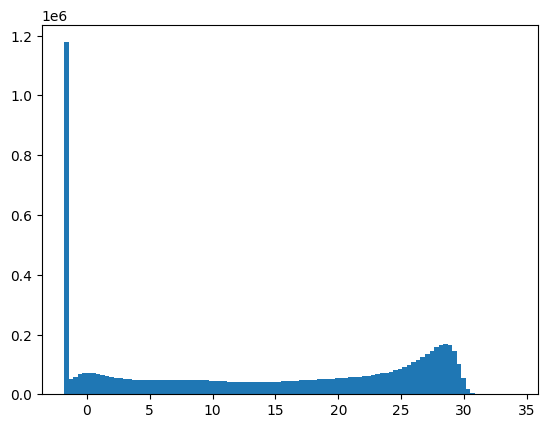

In [8]:
plt.hist(df.sst.values.flatten(),bins=100)